In [1]:
from test_beta_package import *
%matplotlib inline

In [2]:
# general check of the folder structure and assign variables
path_data_folder, path_raw_data_folder, path_process_data_folder, path_top_folder, path_info_dir, path_analysis_dir, \
path_plots_dir, path_single_pred_dir, path_multi_pred_dir = folder_structure()

In [3]:
#load the pickle files and assign dictionary to variables
data_continous_ratemaps, data_binned_glm = \
    processing_and_loading(path_raw_data_folder, path_process_data_folder, 
                           data_continous_ratemaps_pickle="rm_pre_data_diana_chasing2_notreheaded_XYZeuler_notricks_eo.pkl",
                           data_binned_glm_pickle="binned_4_GLM_rm_pre_data_diana_chasing2_notreheaded_XYZeuler_notricks_eo.pkl")


In [4]:
# obtain the information and save them for further processing
predictors_name_list, cells_id, animal_name = get_data_information(path_info_dir, data_continous_ratemaps)
print(f"the predicotrs are {predictors_name_list}")

the predicotrs are ['B Speeds', 'C Body_direction', 'D Allo_head_direction', 'G Neck_elevation', 'K Ego3_Head_roll', 'L Ego3_Head_pitch', 'M Ego3_Head_azimuth', 'N Back_pitch', 'O Back_azimuth', 'P Ego2_head_roll', 'Q Ego2_head_pitch', 'R Ego2_head_azimuth', 'B Speeds_1st_der', 'C Body_direction_1st_der', 'C Body_direction_2nd_der', 'D Allo_head_direction_1st_der', 'D Allo_head_direction_2nd_der', 'G Neck_elevation_1st_der', 'G Neck_elevation_2nd_der', 'K Ego3_Head_roll_1st_der', 'K Ego3_Head_roll_2nd_der', 'L Ego3_Head_pitch_1st_der', 'L Ego3_Head_pitch_2nd_der', 'M Ego3_Head_azimuth_1st_der', 'M Ego3_Head_azimuth_2nd_der', 'N Back_pitch_1st_der', 'N Back_pitch_2nd_der', 'O Back_azimuth_1st_der', 'O Back_azimuth_2nd_der', 'P Ego2_head_roll_1st_der', 'P Ego2_head_roll_2nd_der', 'Q Ego2_head_pitch_1st_der', 'Q Ego2_head_pitch_2nd_der', 'R Ego2_head_azimuth_1st_der', 'R Ego2_head_azimuth_2nd_der']


In [5]:
# assign values to the model's parameters
dict_param = dict_parameters_hmm(path_info_dir, animal_name, num_dimen=1, num_categ_obs=2, N_iters=2,
                                 tolerance=10**-5, num_predictors=5, max_num_states=3,
                                 observation_type="input_driven_obs",
                                 transistion_type="standard", optim_method="em")

In [6]:
# extract the indices and totaltime from spike trains. With this function you select "num_indep_neurons" cells randomly
cell_index, tot_time = cells_selection_manual(path_info_dir, data_continous_ratemaps, data_binned_glm, dict_param, 'cells_selection.csv')


cell indices are [35]


In [7]:
# %%capture cap --no-stderr 
# processing of data and creation of instances for the inference
glmhmms_ista, process_neur, inputs_list, T_list, tot_masked_indices_list, path_plots_list, plots_folder = \
    data_structure(path_info_dir, path_analysis_dir, path_single_pred_dir, data_continous_ratemaps, data_binned_glm,
                   dict_param,
                   tot_time, cell_index, predictor_file='test_predictors.csv')

the iloc approach is 0               B Speeds
1       B Speeds_1st_der
2       K Ego3_Head_roll
3      L Ego3_Head_pitch
4    M Ego3_Head_azimuth
Name: Predictors', dtype: object
loading file I obtain ['B Speeds', 'B Speeds_1st_der', 'K Ego3_Head_roll', 'L Ego3_Head_pitch', 'M Ego3_Head_azimuth']
NAME OF THE FOLDER IS C:\Users\teof\PycharmProjects\pythonREGITglmhmm\postural_glm_hmm\results_folder\plots_dir/single_pred_dir/diana_notreheaded_singlepredictor_2022-10-28_run/
IMPORTANT: given the presence of nans (missing points of the camera) part of the data are deleted.If the number of missing points is 'small enough', it should not interfere with the inference.Below the ratio of missing points
predictor list ['B Speeds', 'B Speeds_1st_der', 'K Ego3_Head_roll', 'L Ego3_Head_pitch', 'M Ego3_Head_azimuth']
[nan nan nan ... nan nan nan]
[nan nan nan ... nan nan nan]
[5.62521328 6.05557478 6.2165284  ...        nan        nan        nan]
[ -8.12580534  -8.33623325  -8.65236889 ... -66.444445

In [8]:
# fitting section, where you run the inference
fit_ll_states_list, glmhmms_ista, time_states_comp = inference_section(path_analysis_dir, path_info_dir, dict_param,
                                                                       glmhmms_ista=glmhmms_ista, process_neur=process_neur,
                                                                       inputs_list=inputs_list)

number of states model is 2 states
number predictor is 0


  0%|          | 0/2 [00:00<?, ?it/s]

computation time loop 0 is 1.428741216659546
number predictor is 1


  0%|          | 0/2 [00:00<?, ?it/s]

computation time loop 1 is 1.021909475326538
number predictor is 2


  0%|          | 0/2 [00:00<?, ?it/s]

computation time loop 2 is 0.9531269073486328
number predictor is 3


  0%|          | 0/2 [00:00<?, ?it/s]

computation time loop 3 is 1.1647768020629883
number predictor is 4


  0%|          | 0/2 [00:00<?, ?it/s]

computation time loop 4 is 1.032806634902954
number of states model is 3 states
number predictor is 0


  0%|          | 0/2 [00:00<?, ?it/s]

computation time loop 5 is 1.6225974559783936
number predictor is 1


  0%|          | 0/2 [00:00<?, ?it/s]

computation time loop 6 is 1.85420560836792
number predictor is 2


  0%|          | 0/2 [00:00<?, ?it/s]

computation time loop 7 is 1.4383525848388672
number predictor is 3


  0%|          | 0/2 [00:00<?, ?it/s]

computation time loop 8 is 1.5646889209747314
number predictor is 4


  0%|          | 0/2 [00:00<?, ?it/s]

computation time loop 9 is 1.5520546436309814
The total time for the inference is 13.633260250091553


In [9]:
%%capture cap --no-stderr
# post analysis processing. Here you obtain the posterior probabilities list with structure described in the code
posterior_probs_list = posterior_prob_process(path_info_dir, path_analysis_dir, dict_param=dict_param,
                                              glmhmms_ista=glmhmms_ista, process_neur=process_neur,
                                              inputs_list=inputs_list)

In [10]:
# further processing of posterior to get the total occupancy for each state
states_occupancies = states_occupancies_computation(path_analysis_dir, path_info_dir, posterior_probs_list)

[[0.33164312 0.32784301 0.34051386]
 [0.33465726 0.33553684 0.32980589]
 [0.3370835  0.34248738 0.32042912]
 ...
 [0.30986455 0.44818123 0.24195423]
 [0.30980163 0.44820725 0.24199112]
 [0.30973477 0.44823212 0.24203311]]
[array([[0.6164694 , 0.3835306 ],
       [0.61457754, 0.38542246],
       [0.6127203 , 0.3872797 ],
       ...,
       [0.28570337, 0.71429663],
       [0.2860817 , 0.7139183 ],
       [0.28646422, 0.71353578]])]


In [11]:
# Below s a sample of plots

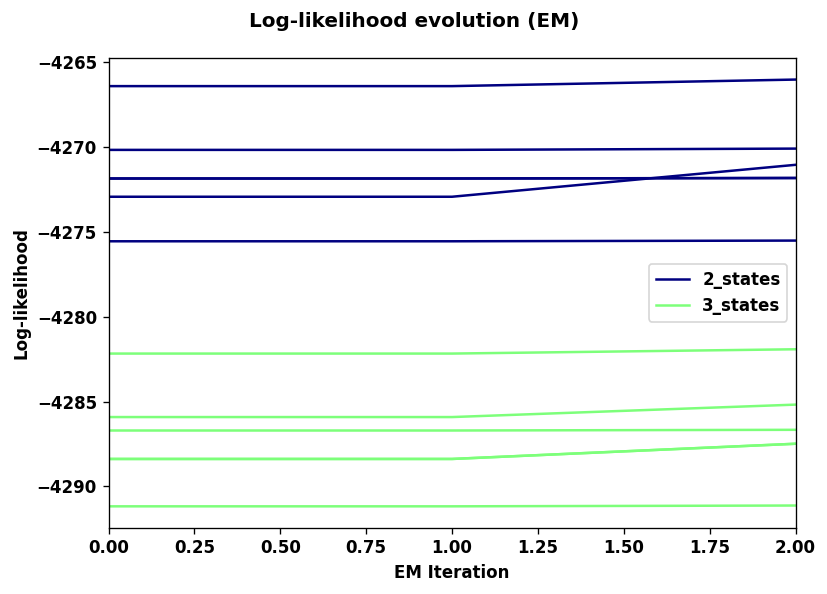

In [12]:
log_like_evolution_per_states(path_analysis_dir, path_info_dir, dict_processed_objects=0)

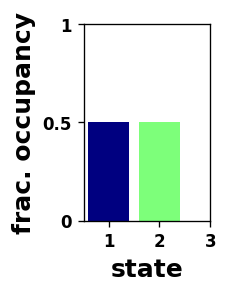

In [13]:
states_occupancies_histogram(path_analysis_dir, path_info_dir, dict_param=dict_param,
                             states_occupancies=states_occupancies)

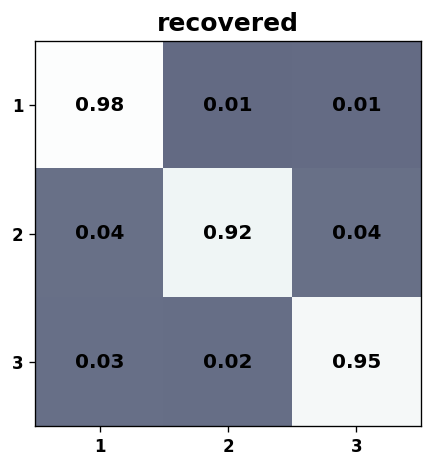

In [14]:
transition_prob_matrix(path_analysis_dir, path_info_dir, glmhmms_ista=glmhmms_ista, dict_param=dict_param)

inferred and transformed weights are {'2_states': [array([[[0.50130714, 0.9869468 ]],

       [[0.5012046 , 0.98886064]]]), array([[[0.49999818, 0.98992145]],

       [[0.49995747, 0.98945748]]]), array([[[0.49884418, 0.98939099]],

       [[0.49875842, 0.98842989]]]), array([[[0.50109637, 0.98990766]],

       [[0.50053733, 0.99034023]]]), array([[[0.50071258, 0.98982516]],

       [[0.50055747, 0.98895177]]])], '3_states': [array([[[0.50121869, 0.98839135]],

       [[0.5020343 , 0.98806909]],

       [[0.50026499, 0.98797753]]]), array([[[0.49983141, 0.99030464]],

       [[0.50023269, 0.9895697 ]],

       [[0.50012134, 0.98769458]]]), array([[[0.49911748, 0.98876133]],

       [[0.49768342, 0.98908518]],

       [[0.49941441, 0.99012491]]]), array([[[0.50148682, 0.9900219 ]],

       [[0.50052321, 0.99042505]],

       [[0.5005196 , 0.98981589]]]), array([[[0.50101522, 0.98806943]],

       [[0.50119448, 0.98893799]],

       [[0.50056631, 0.98953478]]])]}


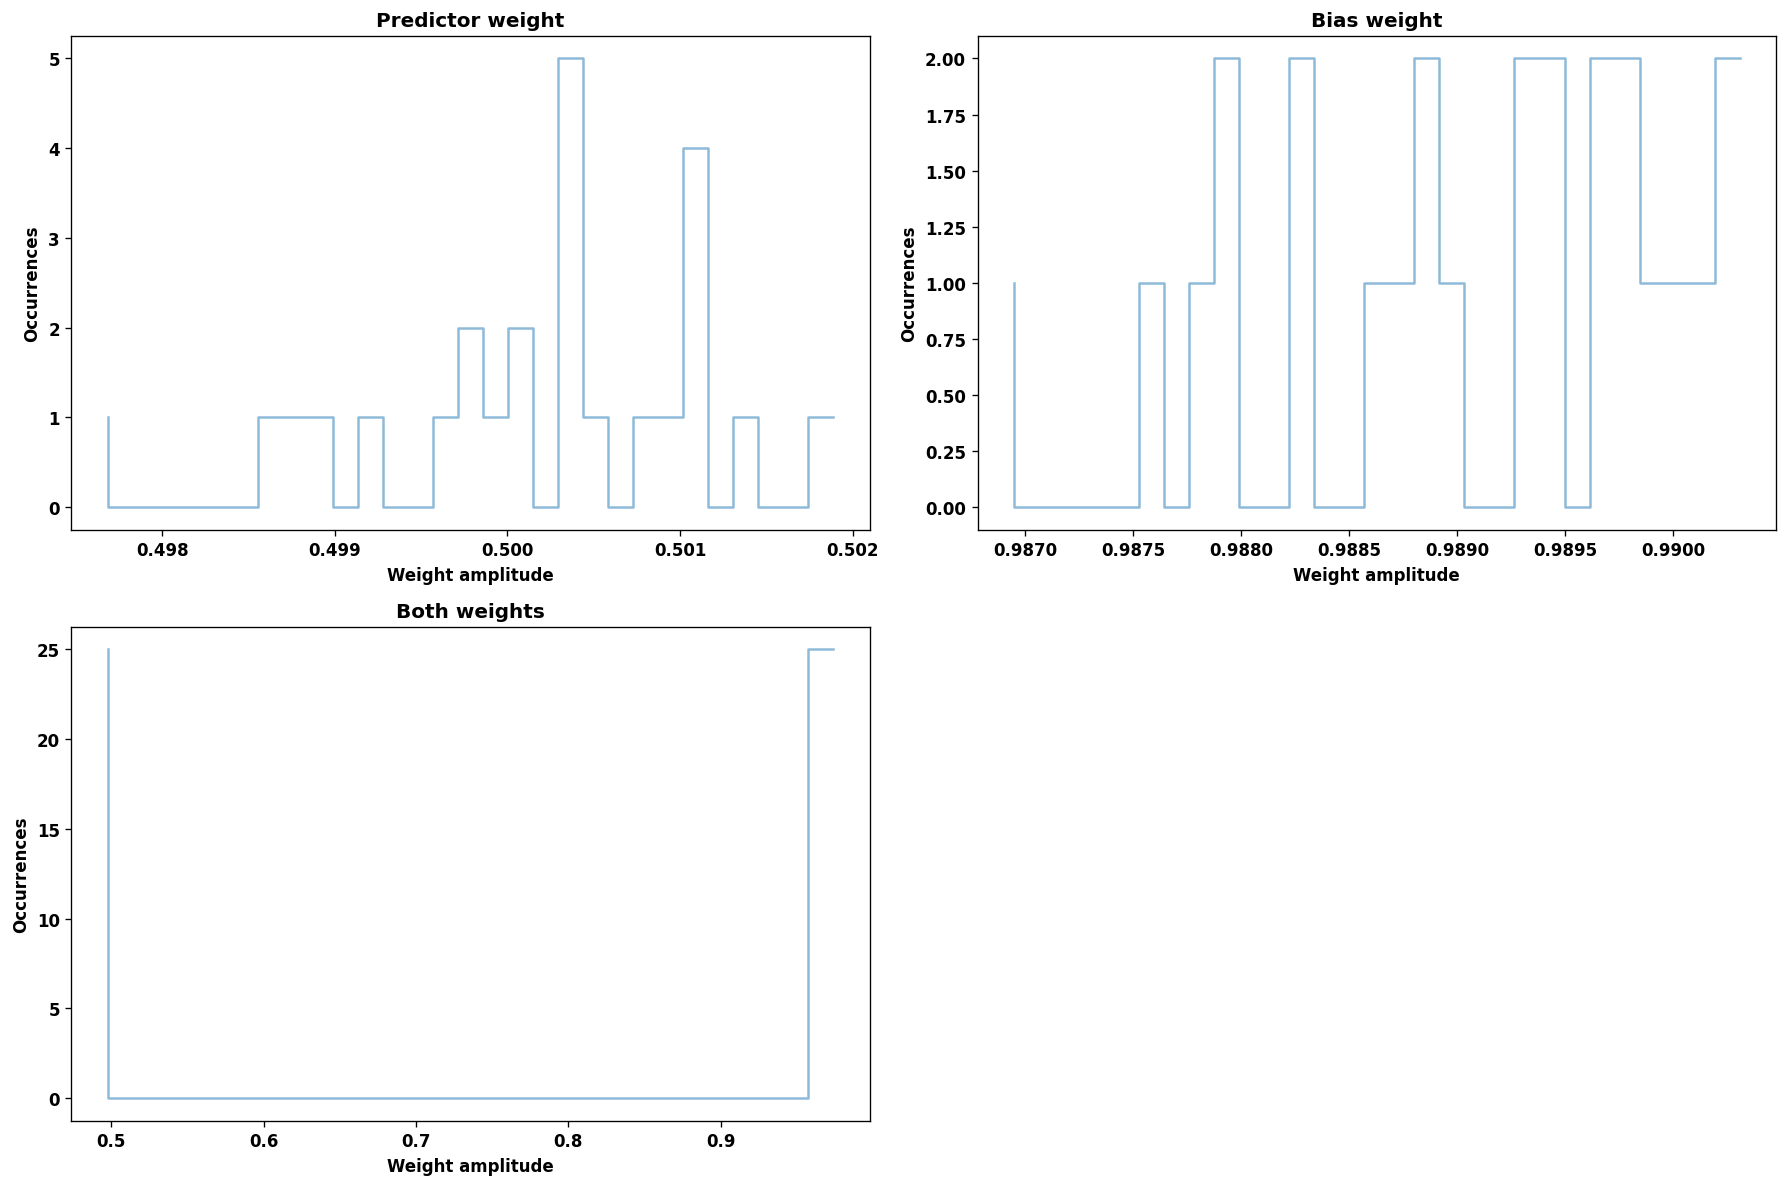

In [15]:
weights_distribution_histogram(path_analysis_dir, path_info_dir)

B Speeds
max value is 142.80865060977234
[0.07487889 0.0766196  0.07848439 ... 0.00262305 0.00351983 0.00450197]


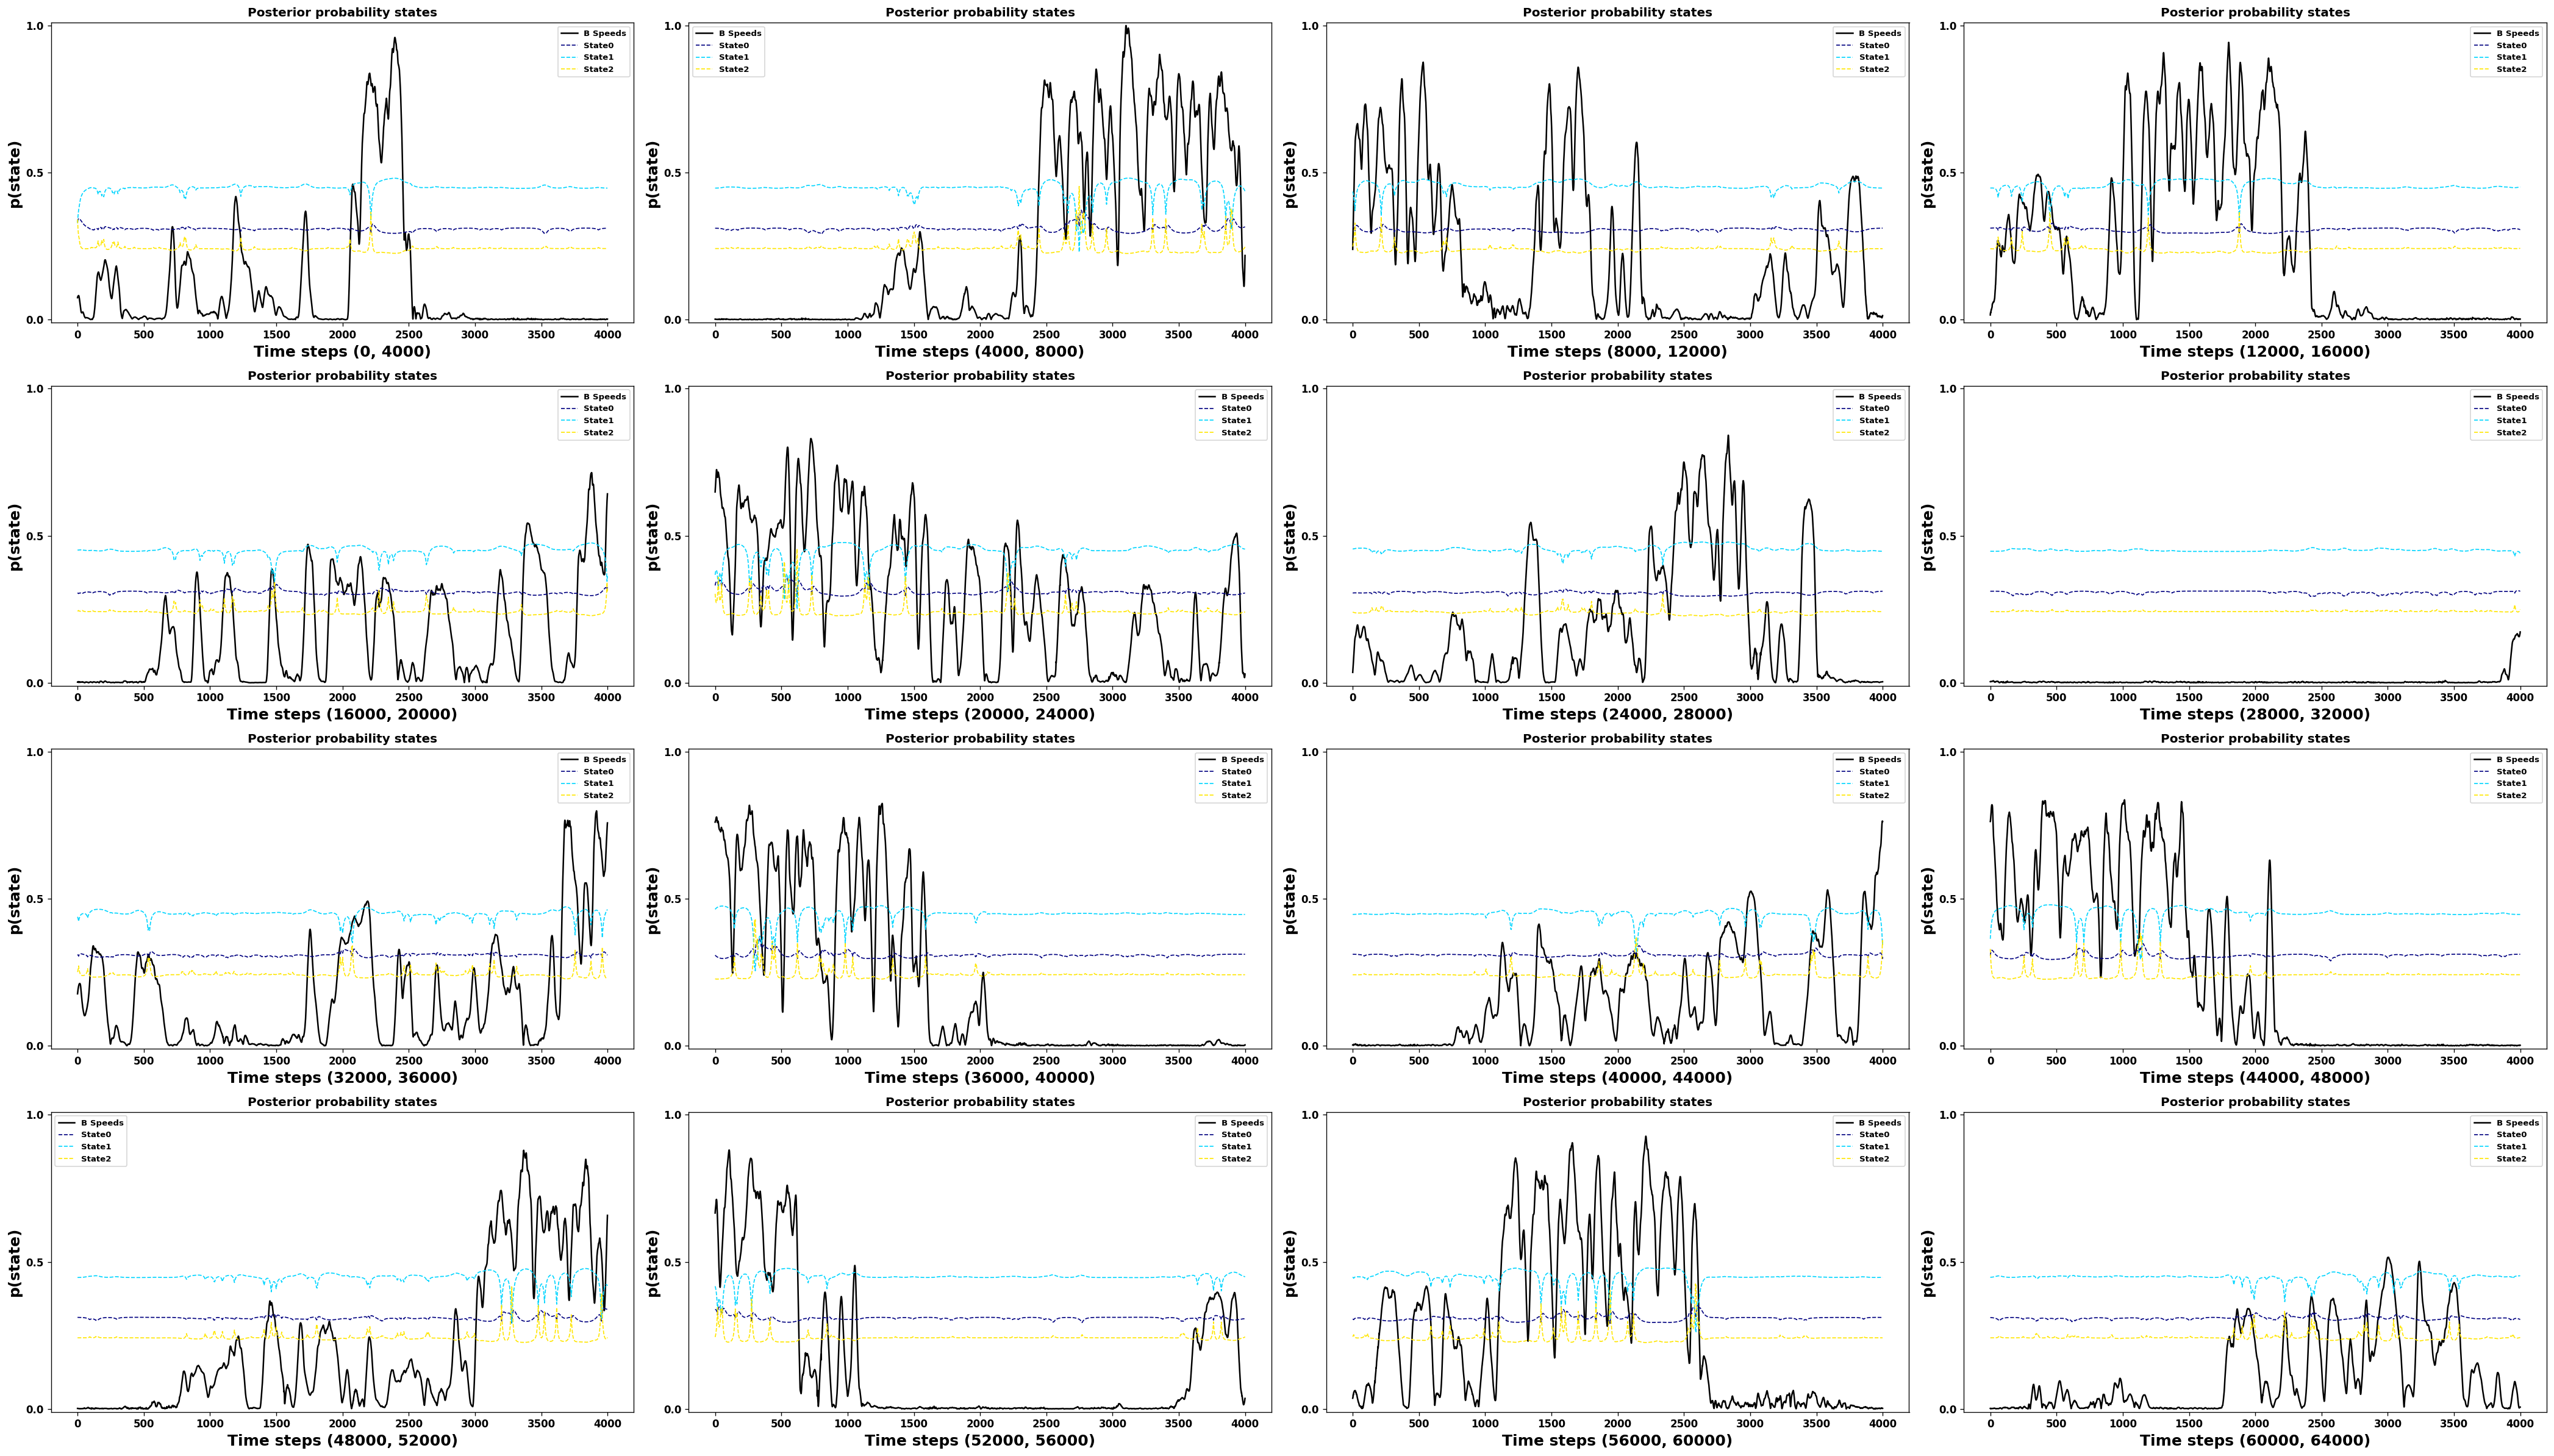

In [16]:
posterior_prob_per_states_with_predictor(path_analysis_dir, path_info_dir, data_continous_ratemaps, posterior_probs_list=posterior_probs_list,
                                             tot_masked_indices_list=tot_masked_indices_list, T_list=T_list,
                                             pred_index=0)